In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 数据源 URL
url = "https://data.cityofchicago.org/resource/9hwr-2zxp.csv?$limit=100000"

# 读取数据
df = pd.read_csv(url)

# 查看数据的前几行
display(df.head())

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,13024128,JG202134,2022-12-31T23:55:00.000,055XX W ADAMS ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,RESIDENCE - YARD (FRONT / BACK),False,False,...,29.0,25,15,1139642.0,1898786.0,2022,2023-11-15T15:41:31.000,41.878374,-87.762732,POINT (-87.762731975 41.878373984)
1,12938337,JG100016,2022-12-31T23:50:00.000,014XX W LUNT AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,ALLEY,False,False,...,49.0,1,07,1165385.0,1946614.0,2022,2023-01-07T15:41:08.000,42.009108,-87.666844,POINT (-87.666843608 42.009107852)
2,12938426,JG100085,2022-12-31T23:50:00.000,055XX W WASHINGTON BLVD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,29.0,25,08B,1139357.0,1900199.0,2022,2023-01-07T15:41:08.000,41.882257,-87.763744,POINT (-87.763744015 41.882256634)
3,12938340,JG100005,2022-12-31T23:47:00.000,091XX S LAFLIN ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,APARTMENT,True,False,...,21.0,73,15,1167940.0,1844124.0,2022,2023-01-07T15:41:08.000,41.727812,-87.660399,POINT (-87.660399127 41.72781203)
4,12938351,JG100087,2022-12-31T23:47:00.000,091XX S LAFLIN ST,0560,ASSAULT,SIMPLE,STREET,True,False,...,21.0,73,08A,1167940.0,1844124.0,2022,2023-01-07T15:41:08.000,41.727812,-87.660399,POINT (-87.660399127 41.72781203)


In [ ]:
# 查看数据的基本信息
df.info()

# 统计缺失值
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    100000 non-null  int64  
 1   case_number           100000 non-null  object 
 2   date                  100000 non-null  object 
 3   block                 100000 non-null  object 
 4   iucr                  100000 non-null  object 
 5   primary_type          100000 non-null  object 
 6   description           100000 non-null  object 
 7   location_description  99584 non-null   object 
 8   arrest                100000 non-null  bool   
 9   domestic              100000 non-null  bool   
 10  beat                  100000 non-null  int64  
 11  district              100000 non-null  int64  
 12  ward                  99996 non-null   float64
 13  community_area        100000 non-null  int64  
 14  fbi_code              100000 non-null  object 
 15  x

,0
id,0
case_number,0
date,0
block,0
iucr,0
primary_type,0
description,0
location_description,416
arrest,0
domestic,0


In [ ]:
# 转换时间格式
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour

# 统计不同类型犯罪的数量
display(df['primary_type'].value_counts().head(10))


,count
primary_type,
THEFT,22705
BATTERY,15576
MOTOR VEHICLE THEFT,12568
CRIMINAL DAMAGE,11839
ASSAULT,8172
DECEPTIVE PRACTICE,7025
OTHER OFFENSE,5204
ROBBERY,4022
WEAPONS VIOLATION,3166


<ipython-input-5-574502887f14>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['primary_type'], order=df['primary_type'].value_counts().index[:10], palette="coolwarm")


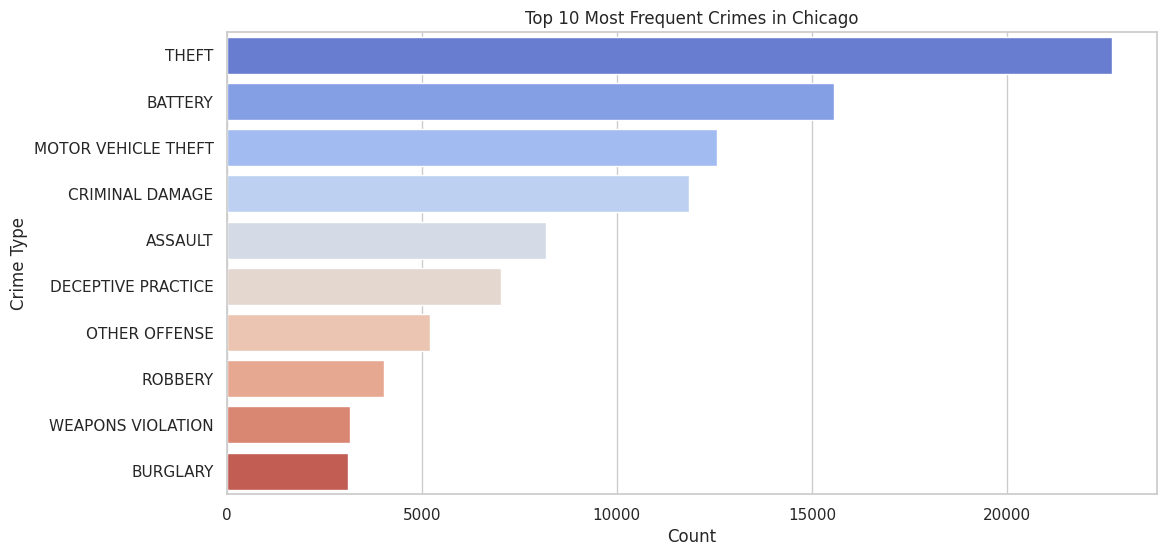

In [ ]:
# 绘制犯罪类型的柱状图
plt.figure(figsize=(12,6))
sns.countplot(y=df['primary_type'], order=df['primary_type'].value_counts().index[:10], palette="coolwarm")
plt.title("Top 10 Most Frequent Crimes in Chicago")
plt.xlabel("Count")
plt.ylabel("Crime Type")
plt.show()

<ipython-input-6-9803fadc6da9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['year'], palette="coolwarm")


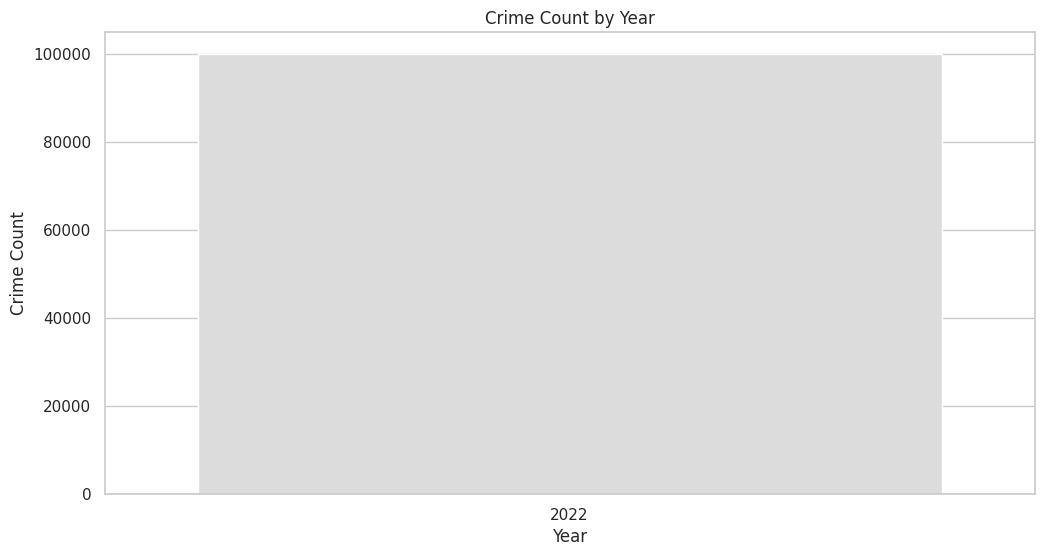

<ipython-input-6-9803fadc6da9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['day_of_week'], order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="coolwarm")


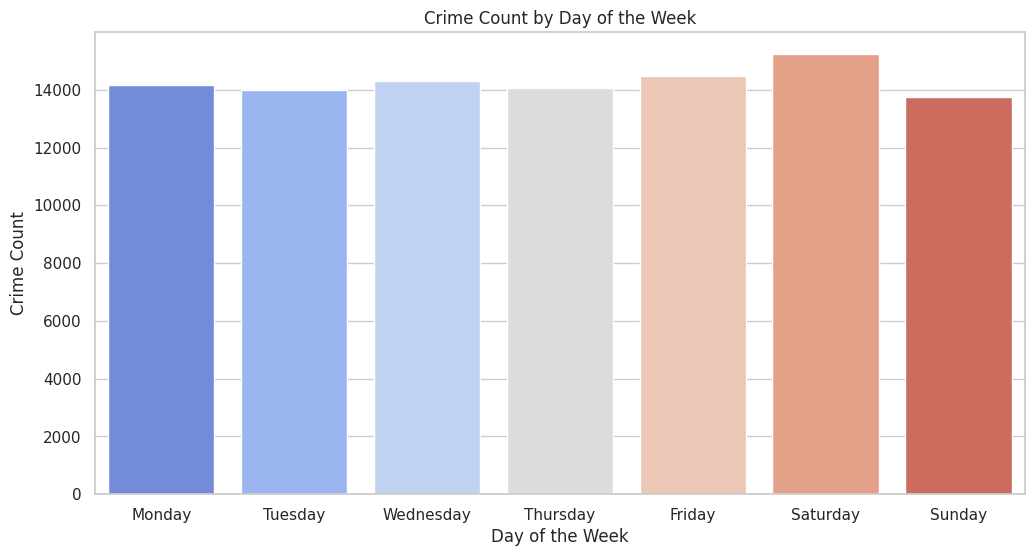

<ipython-input-6-9803fadc6da9>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['hour'], palette="coolwarm")


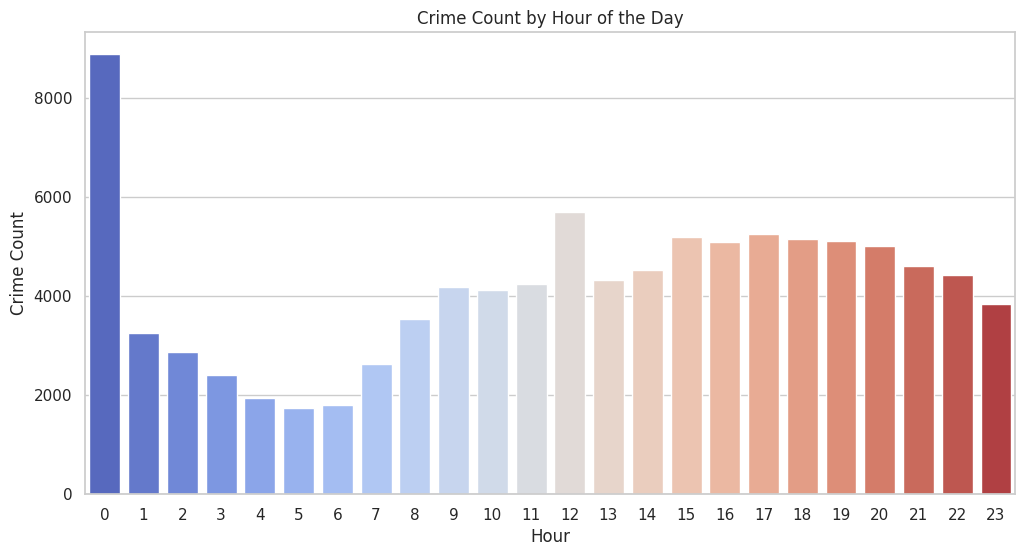

,count
location_description,
STREET,31223
APARTMENT,17570
RESIDENCE,12135
SIDEWALK,4868
PARKING LOT / GARAGE (NON RESIDENTIAL),4240
SMALL RETAIL STORE,2906
ALLEY,2161
RESTAURANT,1960
COMMERCIAL / BUSINESS OFFICE,1458


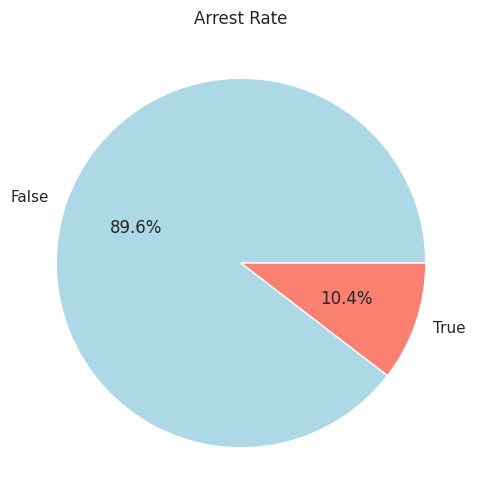

In [ ]:
# 按年份统计犯罪数量
plt.figure(figsize=(12,6))
sns.countplot(x=df['year'], palette="coolwarm")
plt.title("Crime Count by Year")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.show()



<ipython-input-7-6142305a17ce>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['day_of_week'], order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="coolwarm")


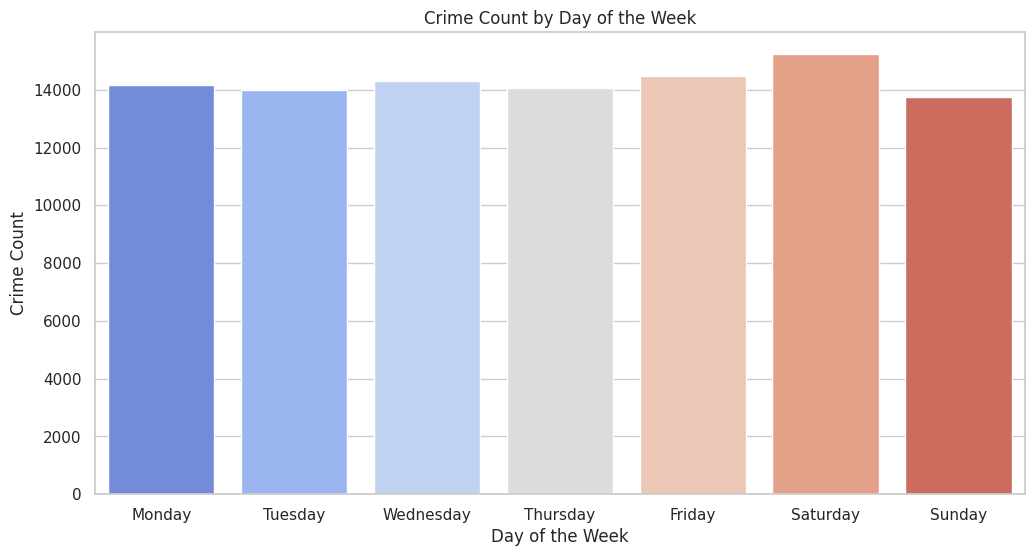

In [ ]:
# 按星期几统计犯罪数量
plt.figure(figsize=(12,6))
sns.countplot(x=df['day_of_week'], order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="coolwarm")
plt.title("Crime Count by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Crime Count")
plt.show()

<ipython-input-8-8b895ac22e12>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['hour'], palette="coolwarm")


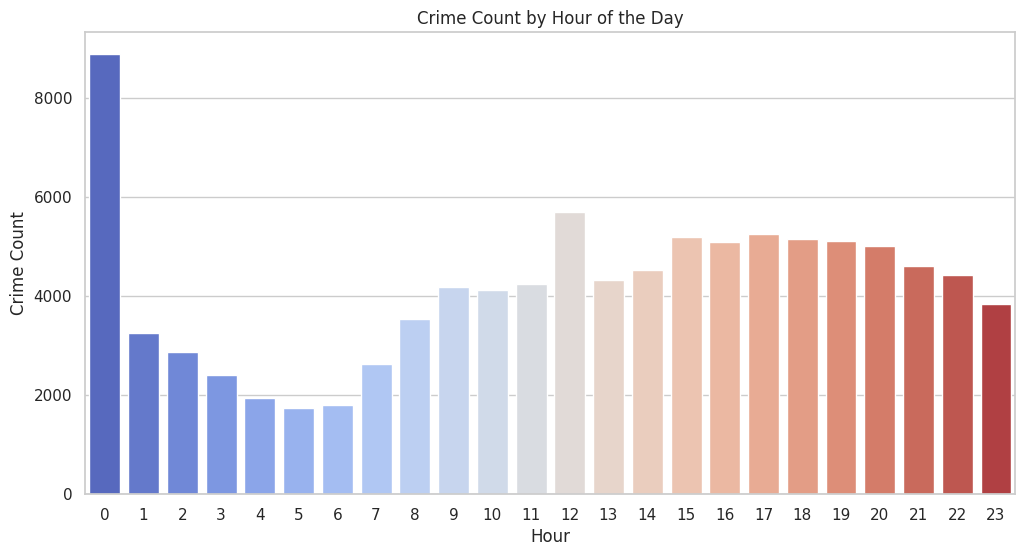

In [ ]:
# 按小时统计犯罪数量
plt.figure(figsize=(12,6))
sns.countplot(x=df['hour'], palette="coolwarm")
plt.title("Crime Count by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Crime Count")
plt.show()



,count
location_description,
STREET,31223
APARTMENT,17570
RESIDENCE,12135
SIDEWALK,4868
PARKING LOT / GARAGE (NON RESIDENTIAL),4240
SMALL RETAIL STORE,2906
ALLEY,2161
RESTAURANT,1960
COMMERCIAL / BUSINESS OFFICE,1458


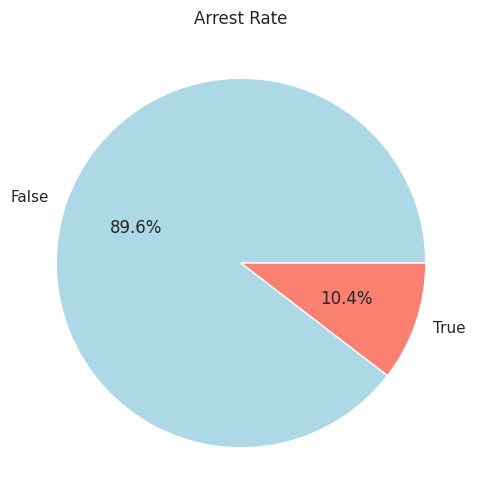

In [ ]:
# 按位置类型统计犯罪数量
display(df['location_description'].value_counts().head(10))

# 统计有无逮捕的案件比例
plt.figure(figsize=(6,6))
df['arrest'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title("Arrest Rate")
plt.ylabel("")
plt.show()